About the Dataset:

1. id: unique id for a news article
2. title: the title of a news article
3. author: author of the news article
4. text: the text of the article; could be incomplete
5. label: a label that marks whether the news article is real or fake:
           1: Fake news
           0: real News





In [49]:

import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [30]:
df=pd.read_csv('train.csv')
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [31]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
print(df.shape)
print(df.info())

(20800, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB
None


In [33]:
df.describe()
print(df.isnull().sum())


id           0
title      558
author    1957
text        39
label        0
dtype: int64


In [34]:
# Kiểm tra tỷ lệ % giá trị bị thiếu
print(df.isnull().mean() * 100)

id        0.000000
title     2.682692
author    9.408654
text      0.187500
label     0.000000
dtype: float64


In [35]:
# In ra stopwords trong tiếng anh
print(stopwords.words("english"))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she


Số lượng giá trị thiếu trong mỗi cột:
id           0
title      558
author    1957
text        39
label        0
dtype: int64


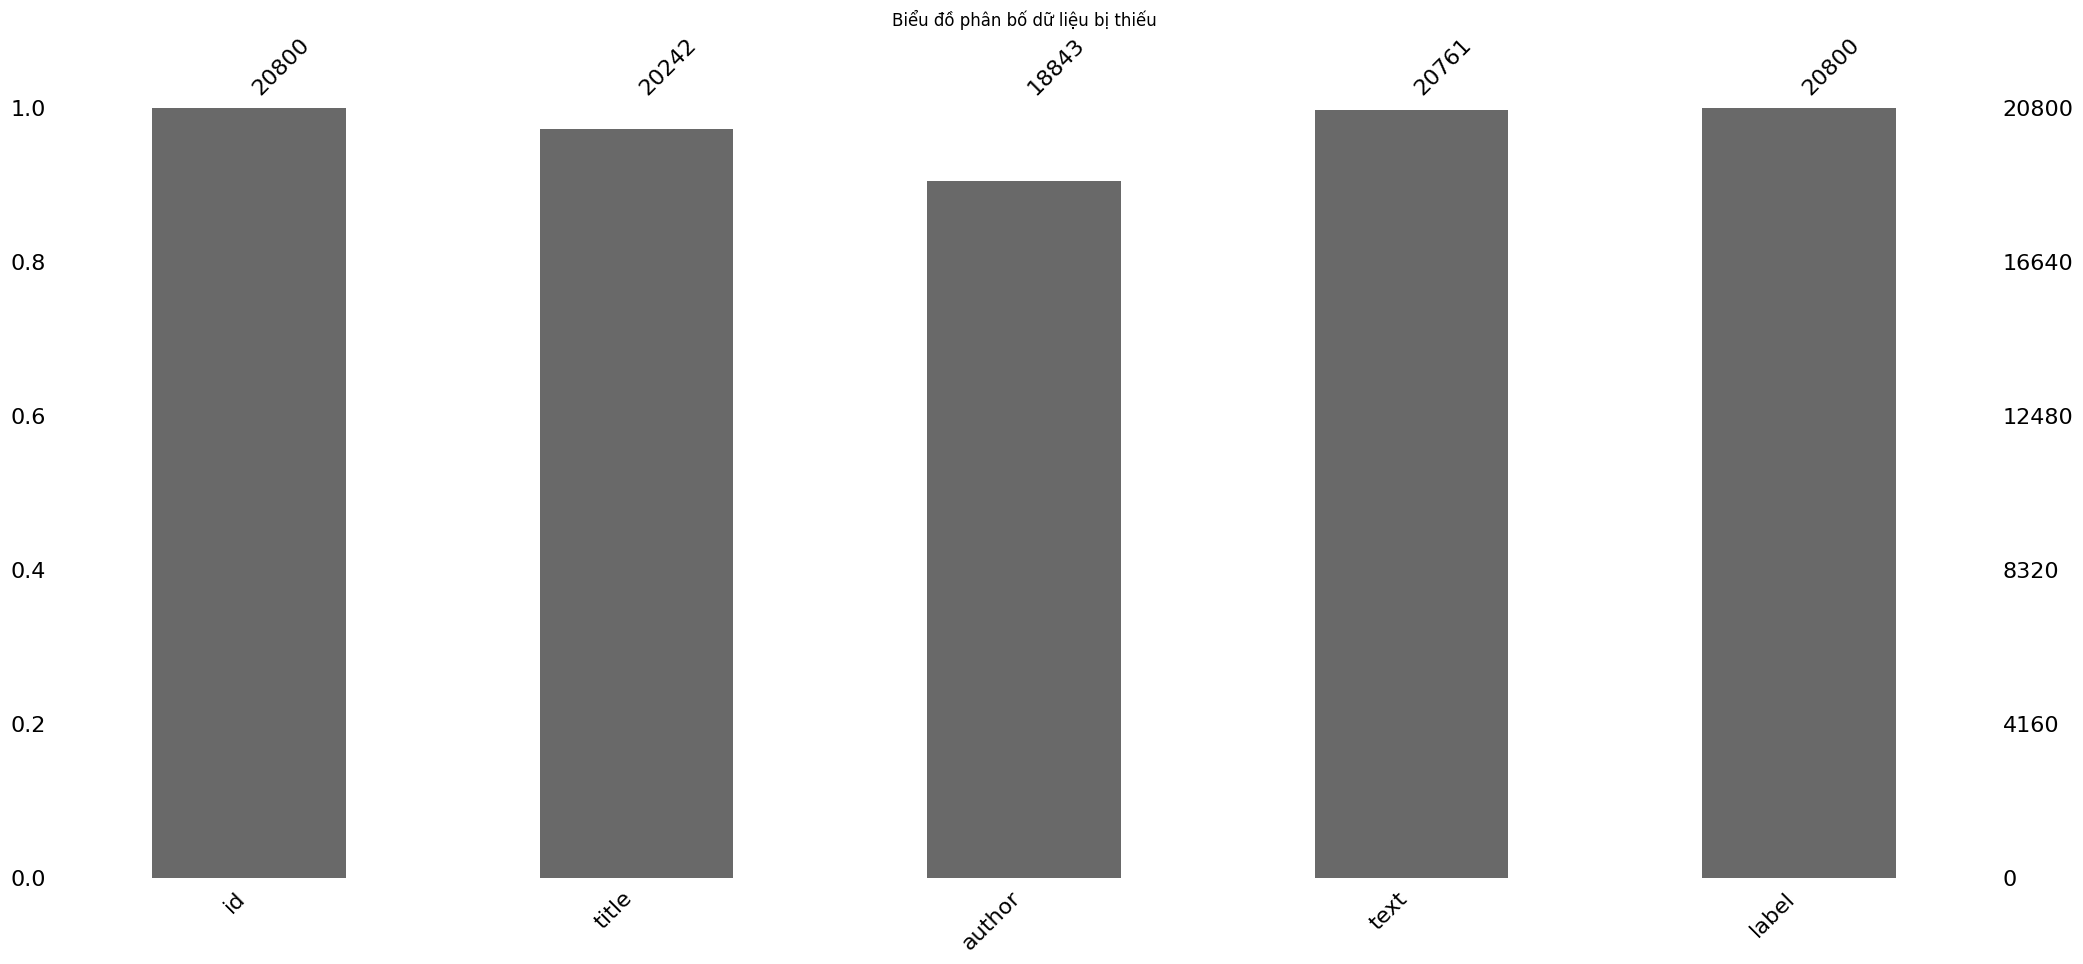

In [36]:
# 2. Kiểm tra dữ liệu bị thiếu
print("\nSố lượng giá trị thiếu trong mỗi cột:")
print(df.isnull().sum())

# Biểu đồ thể hiện dữ liệu bị thiếu
msno.bar(df)
plt.title("Biểu đồ phân bố dữ liệu bị thiếu")
plt.show()


# Tiền xử lý dữ liệu

In [37]:
# Số lượng dòng và cột
print(df.shape)

# Thông tin chung về dữ liệu
print(df.info())

# Kiểm tra số lượng giá trị trống
print(df.isnull().sum())

# Kiểm tra phân bố nhãn
print(df['label'].value_counts())

(20800, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB
None
id           0
title      558
author    1957
text        39
label        0
dtype: int64
label
1    10413
0    10387
Name: count, dtype: int64


In [38]:
print(df.nunique())
selected_columns = ['label', 'author']

# Lấy danh sách unique values cho các cột đã chọn
unique_values_selected = {col: df[col].unique() for col in selected_columns}

# In kết quả
for col, values in unique_values_selected.items():
    print(f"Cột {col}: {values}")
    
# 1 là fake news
# 0 là 0 phải fake news  (real news)

id        20800
title     19803
author     4201
text      20386
label         2
dtype: int64
Cột label: [1 0]
Cột author: ['Darrell Lucus' 'Daniel J. Flynn' 'Consortiumnews.com' ... 'D. Samuelson'
 'Judge Andrew Napolitano' 'Michael J. de la Merced and Rachel Abrams']


In [39]:
# Thay thế dữ liệu null với string rỗng 
df=df.fillna('')

In [40]:
# Merge cột author name với news title 
df['content']=df['author']+" "+df['title']
df.head(5)

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...


In [41]:
# Tách data và label ra
X = df.drop(columns='label', axis=1)
y = df['label']

In [42]:
# Hàm apply_stemming(content, stemmer) thực hiện tiền xử lý văn bản bằng cách loại bỏ dấu câu, chuẩn hóa về chữ thường, 
# loại bỏ các từ dừng (stopwords) và áp dụng stemming để chuyển đổi từ về gốc của nó
def apply_stemming(content, stemmer):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [stemmer.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content
stemmer = PorterStemmer()
df['content'] = df['content'].apply(lambda content: apply_stemming(content, stemmer))

In [43]:
df['content'].head()

0    darrel lucu hous dem aid even see comey letter...
1    daniel j flynn flynn hillari clinton big woman...
2               consortiumnew com truth might get fire
3    jessica purkiss civilian kill singl us airstri...
4    howard portnoy iranian woman jail fiction unpu...
Name: content, dtype: object

In [44]:
X = df['content'].values
y = df['label'].values

In [45]:
print(f"X Shape : {X.shape}")
print(f"y Shape : {y.shape}")

X Shape : (20800,)
y Shape : (20800,)


In [46]:
# cchuyển đổi dữ liệu văn bản thành dạng số của nó
vectorizer = TfidfVectorizer(max_features=9000)
vectorizer.fit(X)

X = vectorizer.transform(X)
print(X.shape)


(20800, 9000)


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.2, random_state=42)

# Khởi tạo các mô hình
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": MultinomialNB(),
    "XGBoost": XGBClassifier()
}

# Tạo một từ điển để lưu trữ các kết quả
results = {}

# Huấn luyện và đánh giá các mô hình
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)  # Huấn luyện mô hình
    
    # Dự đoán trên tập kiểm tra
    y_pred = model.predict(X_test)
    
    # Đánh giá mô hình
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Lưu kết quả
    results[name] = {"accuracy": accuracy, "report": report}

    # In kết quả đánh giá
    print(f"{name} Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    print("="*50)

# Lựa chọn mô hình tốt nhất
best_model = max(results, key=lambda x: results[x]['accuracy'])
print(f"Best Model: {best_model}")


Training Logistic Regression...
Logistic Regression Accuracy: 0.9723557692307693
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2132
           1       0.96      0.99      0.97      2028

    accuracy                           0.97      4160
   macro avg       0.97      0.97      0.97      4160
weighted avg       0.97      0.97      0.97      4160

Training Random Forest...
Random Forest Accuracy: 0.9913461538461539
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2132
           1       0.99      0.99      0.99      2028

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160

Training Support Vector Machine...
Support Vector Machine Accuracy: 0.984375
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2132
          

In [51]:
# Sau khi train với nhiều mô hình thì ta thấy  model tốt nhất là random forest 
# Bây giờ ta sẽ fine-tuning nó  với randomizedSeachCV 
# ( RandomizedSearchCV chọn ngẫu nhiên các tổ hợp tham số từ không gian tham số đã định, 
# giúp giảm thời gian tìm kiếm trong khi vẫn có thể tìm được các tham số tối ưu.)

# 
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Định nghĩa các tham số siêu cho Random Forest
param_dist = {
    'n_estimators': np.arange(100, 1001, 100),  # Số lượng cây trong rừng
    'max_depth': [None, 10, 20, 30, 40],  # Độ sâu tối đa của mỗi cây
    'min_samples_split': [2, 5, 10, 20],  # Số mẫu tối thiểu cần thiết để chia một node
    'min_samples_leaf': [1, 2, 4, 6],  # Số mẫu tối thiểu cần thiết tại mỗi lá
    'max_features': ['auto', 'sqrt', 'log2'],  # Số đặc trưng tối đa để tìm kiếm tại mỗi node
    'bootstrap': [True, False]  # Sử dụng bootstrap hay không
}

# Khởi tạo RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Tạo đối tượng RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, random_state=42, verbose=2)

# Huấn luyện RandomizedSearchCV với dữ liệu huấn luyện
random_search.fit(X_train, y_train)

# In kết quả tốt nhất
print(f"Best parameters found: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_}")

# Dự đoán trên tập kiểm tra với mô hình đã được fine-tune
y_pred = random_search.best_estimator_.predict(X_test)

# Đánh giá mô hình sau khi fine-tune
print(f"Accuracy after fine-tuning: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
215 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
78 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python311\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Python311\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Python311\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_

Best parameters found: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Best cross-validation score: 0.9923677884615383
Accuracy after fine-tuning: 0.9913461538461539
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2132
           1       0.99      0.99      0.99      2028

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



In [56]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Giả sử X_test là bộ dữ liệu test và y_test là nhãn thực tế
# Dự đoán cho toàn bộ bộ test
predictions = model.predict(X_test)

# So sánh với nhãn thực tế
correct_predictions = (predictions == y_test)

# Tính số lượng đúng
correct_count = correct_predictions.sum()

# Tính độ chính xác (accuracy)
accuracy = accuracy_score(y_test, predictions)

# In kết quả độ chính xác
print(f"Số lượng đúng: {correct_count}")
print(f"Độ chính xác: {accuracy * 100:.2f}%")

# Tạo DataFrame để dễ dàng xem cột nhãn thực tế và dự đoán
result_df = pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Label': predictions
})

# Hiển thị DataFrame với nhãn thực tế và dự đoán
print("\nDữ liệu kết quả:")
print(result_df.head(20))  # In ra 5 dòng đầu tiên của DataFrame


Số lượng đúng: 4106
Độ chính xác: 98.70%

Dữ liệu kết quả:
       Actual Label  Predicted Label
14649             1                1
9231              1                1
6473              0                0
18736             0                0
12347             1                1
17157             0                0
14974             1                1
11150             1                1
2174              1                1
1504              1                1
8970              0                0
447               0                0
20376             1                1
19074             0                0
5116              1                1
13118             1                1
13104             1                1
6544              1                1
10645             1                1
8700              0                0
